In [19]:
import numpy as np
data = np.load( "../data/MSL/MSL_test.npy")
label = np.load( "../data/MSL/MSL_test_label.npy")
train = np.load( "../data/MSL/MSL_train.npy")
print(data)
print(len(data))
print(len(data[0]))

# print(train)
print(len(train))
print(len(train[0]))

print(label)
print(len(label))

[[-0.94695788  0.          0.         ...  0.          0.
   0.        ]
 [-0.94227769  0.          0.         ...  0.          0.
   0.        ]
 [-0.93603744  0.          0.         ...  0.          0.
   0.        ]
 ...
 [ 0.50122056  0.          0.         ...  0.          0.
   0.        ]
 [ 0.50122056  0.          0.         ...  0.          0.
   0.        ]
 [-0.95421168  0.          0.         ...  0.          0.
   0.        ]]
73729
55
58317
55
[False False False ... False False False]
73729


In [20]:
import pandas as pd

train_data_origin = pd.read_excel(( 'dataset/charger/charger_train.xlsx'), header=3, usecols=['开始SOC', '结束SOC', '充电时长（分钟）', '尖电量（kWh）', '峰电量（kWh）', '平电量（kWh）', '低谷电量（kWh）', '总电量（kWh）', '应付（元）'], na_values='#N').to_numpy()
test_data_origin = pd.read_excel(( 'dataset/charger/charger_test.xlsx'), header=3, usecols=['开始SOC', '结束SOC', '充电时长（分钟）', '尖电量（kWh）', '峰电量（kWh）', '平电量（kWh）', '低谷电量（kWh）', '总电量（kWh）', '应付（元）'], na_values='#N').to_numpy()

np.save('dataset/charger/charger_train.npy', train_data_origin)
np.save('dataset/charger/charger_test.npy', test_data_origin)
print(train_data_origin)
print(len(train_data_origin))
print(len(train_data_origin[0]))

print(len(test_data_origin))

[[4.1000e+01 1.0000e+02 1.2452e+02 ... 2.7837e+02 2.7837e+02 2.0042e+02]
 [3.7000e+01 1.0000e+02 1.2300e+02 ... 2.9302e+02 2.9302e+02 2.1098e+02]
 [7.5000e+01 1.0000e+02 7.0230e+01 ... 1.2786e+02 1.2786e+02 9.2060e+01]
 ...
 [4.2000e+01 4.2000e+01 8.7000e-01 ... 1.6000e+00 1.6000e+00 1.1200e+00]
 [3.2000e+01 3.2000e+01 7.0000e-02 ... 0.0000e+00 4.0000e-02 4.0000e-02]
 [4.8000e+01 4.8000e+01 2.3000e-01 ... 0.0000e+00 1.2000e-01 1.2000e-01]]
460
9
269


In [35]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder

data = pd.read_excel(( 'dataset/charger/charger1_0.xlsx'),  na_values='#N')

# 假设你已经知道哪些列是字符串类型，或者你可以这样自动找出它们
str_columns = data.select_dtypes(include=[object]).columns

# 创建一个 LabelEncoder 对象
encoder = LabelEncoder()

# 对每个字符串列应用 LabelEncoder
for column in str_columns:
    data[column] = encoder.fit_transform(data[column])
    
    # 填充NaN值
    data[column].fillna(data[column].mean(), inplace=True)

    # 确保没有无限值
    data.replace([np.inf, -np.inf], 0, inplace=True)

# print(data.head())

# print(data.shape)
# # 提取标签列
# print(data.head())

labels = data['electricity'].values


from sklearn.preprocessing import StandardScaler
import pandas as pd

# 创建StandardScaler对象
scaler = StandardScaler()

# 假设df是你的DataFrame
df_standardized = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)

# 提取除标签外的特征数据
features = df_standardized.to_numpy()
# features = df_standardized.drop(columns=['stop_reason']).to_numpy()
data[column].fillna(-1, inplace=True)

# 显示一些信息确保数据加载正确
print("标签数组维度:", labels.shape)
print("特征数组维度:", features.shape)

# 随机打乱数据
# np.random.shuffle(charge1)


# 计算分割点
split_index = int(0.8 * len(features))  # 20%的数据用于测试集

# 分割数据
train_data = features[:split_index]
test_data = features[split_index:]
test_data_label = labels[split_index:]



np.save('dataset/charger/charger1_test.npy', test_data)
np.save('dataset/charger/charger1_train.npy', train_data)
np.save('dataset/charger/charger1_test_label.npy', test_data_label)


# Replacing NaNs with the mean of the column (if it's a numerical dataset)

# for column in str_columns:
#     data[column].fillna(-1, inplace=True)

# # Assuming `data` is your dataset
# print("Number of NaN values:", np.isnan(data).sum())
# print("Number of infinite values:", np.isinf(data).sum())



标签数组维度: (21692,)
特征数组维度: (21692, 40)
Number of NaN values: id                        0
station_code              0
charging_pile_code        0
charging_gun_code         0
record_index              0
order_code                0
user_id                   0
source                   14
operator_code             0
card_balance             14
vin                       0
start_time                0
end_time                  0
start_elect              15
end_elect                15
start_soc                15
end_soc                  15
charging_model           15
start_value               0
start_type                0
start_up_time             0
rate_type                15
rate_version             15
elect_money               0
service_money            16
park_money                0
time_part                17
rate_data                 0
original_data             0
electricity              17
charging_duration        16
process_state            17
throwable_type           17
create_time      

/home/kyuan/miniconda3/envs/timesnet/lib/python3.8/site-packages/sklearn/utils/extmath.py:1047: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/home/kyuan/miniconda3/envs/timesnet/lib/python3.8/site-packages/sklearn/utils/extmath.py:1052: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/home/kyuan/miniconda3/envs/timesnet/lib/python3.8/site-packages/sklearn/utils/extmath.py:1072: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


station_code


ValueError: 'c' argument has 150 elements, which is inconsistent with 'x' and 'y' with size 92.

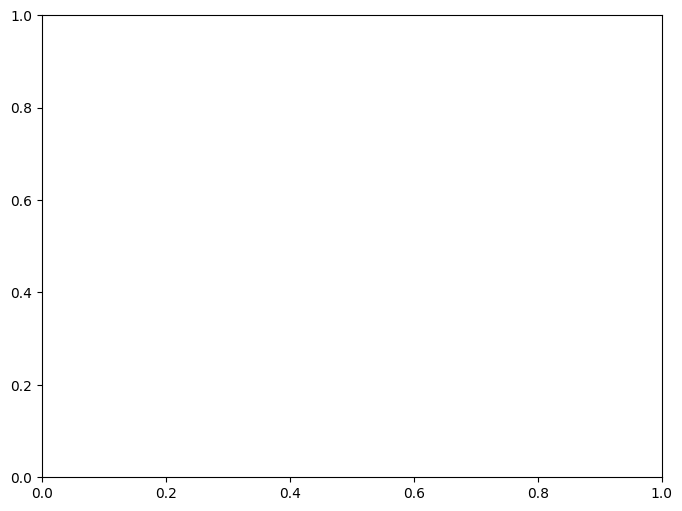

In [5]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


data = pd.read_excel(( 'dataset/charger/charger1.xlsx'),  na_values='#N')

# 初始化独热编码器
encoder = OneHotEncoder(sparse_output=False)

# 存储编码后的DataFrame
encoded_data = pd.DataFrame()

# for column in data.columns:
column = "station_code"
print(column)
# 检查列是否为非数字类型
if data[column].dtype == 'object':
    # 去重
    unique_values = data[[column]].drop_duplicates()
    
    # 独热编码
    encoded = encoder.fit_transform(unique_values)
    
    
    # 转换编码结果为DataFrame，并添加合适的列名
    encoded_df = pd.DataFrame(encoded, columns=[f"{column}_{cat}" for cat in encoder.categories_[0]])
    
    # 将编码结果加入到结果DataFrame
    encoded_data = pd.concat([encoded_data, encoded_df], axis=1)

# 应用PCA
pca = PCA(n_components=2)  # 降低到2维
X_pca = pca.fit_transform(encoded_data)


# 可视化结果
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Combined Dataset')
plt.legend(*scatter.legend_elements(), title="Classes")
plt.show()

# 显示编码后的结果
print("编码后的数据:")
print(encoded_data)

# 显示原始数据
print("原始数据:")
print(data)




In [4]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

# 加载数据集（这里使用Iris数据集作为示例，实际上Iris数据集不含分类特征，此处仅为演示）
data = load_iris()
X = data.data
y = data.target

# 假设将y转换为分类特征（实际操作中应根据数据情况进行）
df = pd.DataFrame(X, columns=data.feature_names)
df['species'] = pd.Categorical.from_codes(y, categories=data.target_names)

# 独热编码
encoder = OneHotEncoder(sparse_output=False)
X_encoded = encoder.fit_transform(df[['species']])  # 只对species列进行编码

# 合并编码后的数据与原始数据
X_combined = pd.concat([df.drop(columns=['species']), pd.DataFrame(X_encoded, columns=encoder['species'])], axis=1)

# 应用PCA
pca = PCA(n_components=2)  # 降低到2维
X_pca = pca.fit_transform(X_combined)

# 可视化结果
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Combined Dataset')
plt.legend(*scatter.legend_elements(), title="Classes")
plt.show()


TypeError: 'OneHotEncoder' object is not subscriptable

In [39]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder

data = pd.read_excel(( 'dataset/charger/charger1.xlsx'), usecols=[], na_values='#N')

# 假设你已经知道哪些列是字符串类型，或者你可以这样自动找出它们
str_columns = data.select_dtypes(include=[object]).columns
# electricity


print(str_columns)

Index(['id', 'station_code', 'charging_pile_code', 'charging_gun_code',
       'record_index', 'order_code', 'user_id', 'operator_code', 'vin',
       'start_time', 'end_time', 'start_value', 'start_type', 'start_up_time',
       'elect_money', 'park_money', 'rate_data', 'original_data',
       'create_time', 'modify_time'],
      dtype='object')
